In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [20]:
# load dataset and show the first five sample
mydata = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv")
mydata.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# describe data
mydata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [22]:
# create new dataframe that consist only annual income and spending score
mydatanew = mydata[["Annual Income (k$)","Spending Score (1-100)"]]
mydatanew.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data with standardization method

In [30]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mydatanew.to_numpy())
scaled_features = pd.DataFrame(scaled_features,columns=["Annual Income (k$)","Spending Score (1-100)"])
scaled_features.rename({'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending'}, axis=1, inplace=True)
scaled_features.head(5)

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [127]:
# get stastical information on the new dataset
from pandas import DataFrame
mydatanew = DataFrame(scaled_features)
# summarize
mydatanew.describe()

,income,spending,label
count,2.000000e+02,2.000000e+02,200.000000
mean,-2.131628e-16,-1.465494e-16,2.095000
std,1.002509e+00,1.002509e+00,1.234339
min,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.275093e-01,-5.997931e-01,1.000000
50%,3.587926e-02,-7.764312e-03,2.000000
75%,6.656748e-01,8.851316e-01,3.000000
max,2.917671e+00,1.894492e+00,4.000000


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

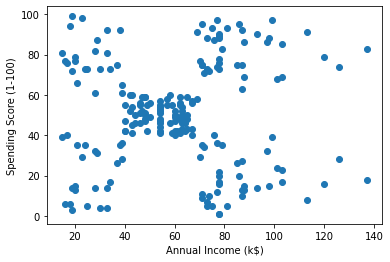

In [47]:
# Visualize the position 
plt.scatter(mydata["Annual Income (k$)"],mydata["Spending Score (1-100)"] , cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

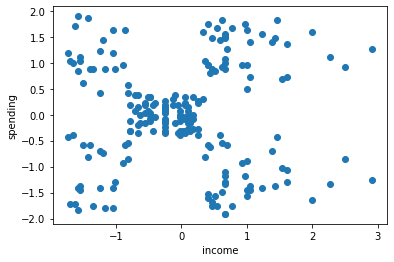

In [38]:
# Visualize the position using the original scale
plt.scatter(mydatanew["income"],mydatanew["spending"] , cmap='viridis')
plt.xlabel("income")
plt.ylabel("spending")
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [57]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

model = KMeans(n_clusters=5, max_iter=300, init="random", random_state=42)
kmeans = model.fit_predict(scaled_features)
kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

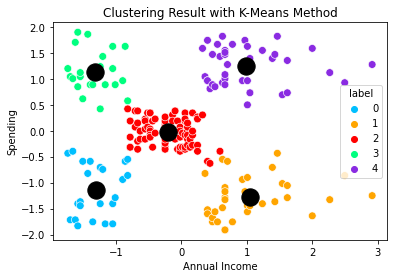

In [91]:
# visualize the result using scater chart
import seaborn as sns
scaled_features["label"] = kmeans
sns.scatterplot(x = 'income',y = 'spending',hue="label", palette=['deepskyblue', 'orange','red','springgreen','blueviolet'], legend='full',data = scaled_features  ,s = 60 )
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='black')
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title('Clustering Result with K-Means Method')
plt.show()

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

In [111]:
# set the parameter for evaluating K
wcss = []
elbow=scaled_features[["income","spending"]]
# check the inertia for each K
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(elbow)
    wcss.append(kmeans.inertia_)

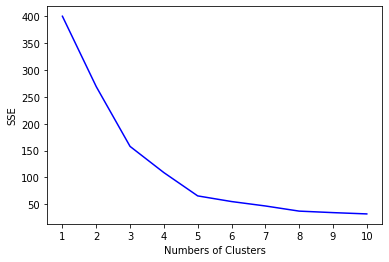

In [117]:
# manually visualize the elbow method using plotlib
# plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, color="blue")
plt.xticks(np.arange(1,11,1))
plt.xlabel("Numbers of Clusters")
plt.ylabel("SSE")
plt.show()


In [123]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("The best k for ypur model is ",findknee.elbow)

The best k for ypur model is  5
